# MONTE CARLO INTEGRATION: AN EXAMPLE
We want to integrate this integral:
$$I = \int_0^{+\infty}dx\,x^3\exp\biggl({-\frac{x^2}{2\sigma^2}}\biggr).$$
We write the integral in this way:
$$I = \int_0^{+\infty}dx\,\Biggl(\sqrt{\frac{\pi \sigma^2}{2}}x^3\Biggr)\Biggl(\sqrt{\frac{2}{\pi \sigma^2}}\exp\biggl({-\frac{x^2}{2\sigma^2}}\biggr)\Biggr).$$
We will extract the numbers following the distribution:
$$p(x) = \sqrt{\frac{2}{\pi \sigma^2}}\exp\biggl({-\frac{x^2}{2\sigma^2}}\biggr), \qquad x = [0, +\infty),$$
which is a "half Gaussian". To obtain this distribution, we can use the Gaussian distribution taking the absolute value of the number extracted.

We compute the integral for various values of N. Fixed N, we compute it many times to get a sample of the integral and we compute the variance of this sample. We should see a convergence of the result to the true value.

In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Text(0, 0.5, 'Integral')

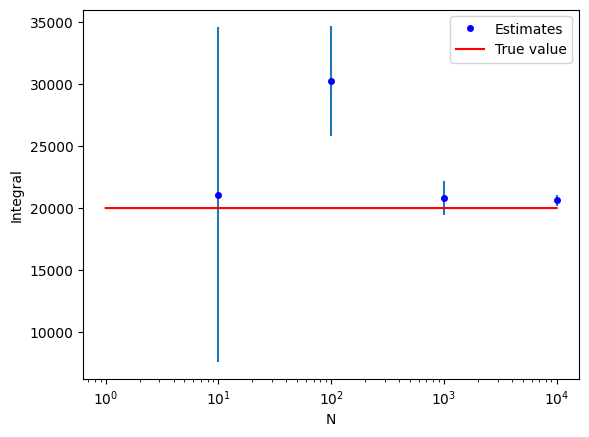

In [33]:
N = np.array([10, 100, 1000, 10000])
values = np.zeros(4)
err = np.zeros(4)
N_sample = 1000
sigma = 10
distrG = sp.stats.norm(0, sigma)

def f(x):
    return np.sqrt(np.pi * sigma**2 / 2) * x**3

integrals = np.zeros([4, N_sample])
for i in range(0, 4):
    for j in range(0, N_sample):
        sample = np.abs(distrG.rvs(N[i]))
        integrals[i][j] = np.mean(f(sample))
    values[i], err[i] = integrals[i][0], np.std(integrals[i])

x_true = np.arange(1, 10000, 0.1)
y_true = np.full(99990, 2 * sigma**4)
plt.errorbar(N, values, err, fmt='None')
plt.semilogx()
plt.plot(N, values, 'bo', markersize=4, label="Estimates")
plt.plot(x_true, y_true, 'r-', label="True value")
plt.legend()
plt.xlabel("N")
plt.ylabel("Integral")

#dir(plt)

As you can see, the error goes down as the number of samples of the distribution increases. Because of the central limit theorem, the error of the integral goes down as $1/\sqrt{N}$. If we plot the error as a function of $1/\sqrt{N}$, we should see a straight line:

Text(0, 0.5, 'Error')

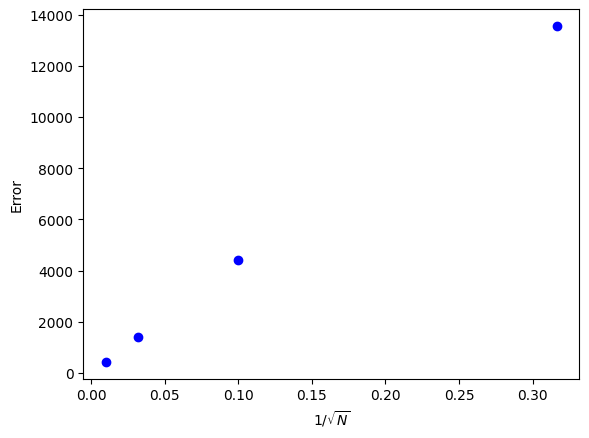

In [34]:
plt.plot(1/np.sqrt(N), err, 'bo')
plt.xlabel(r'$1/\sqrt{N}$')
plt.ylabel("Error")

## Distribution of the estimate
The integral is computed calculating the mean of the numbers $f(x_i)$, which are distributed with a pdf that we don't know. however, because of the central limit theorem, when $N$ is large the mean of this sample, which is the estimate of the integral, is normal-distributed. So we get that the variable $t$ is distributed following the Student's $t$ distribution. For small $N$, the central limit theorem is not applicable, so we can't actually know which is the distribution of the estimate of the integral. To see this, we plot the distribution of the integral for $N$ fixed, and superimpose the Student's $t$ distribution:

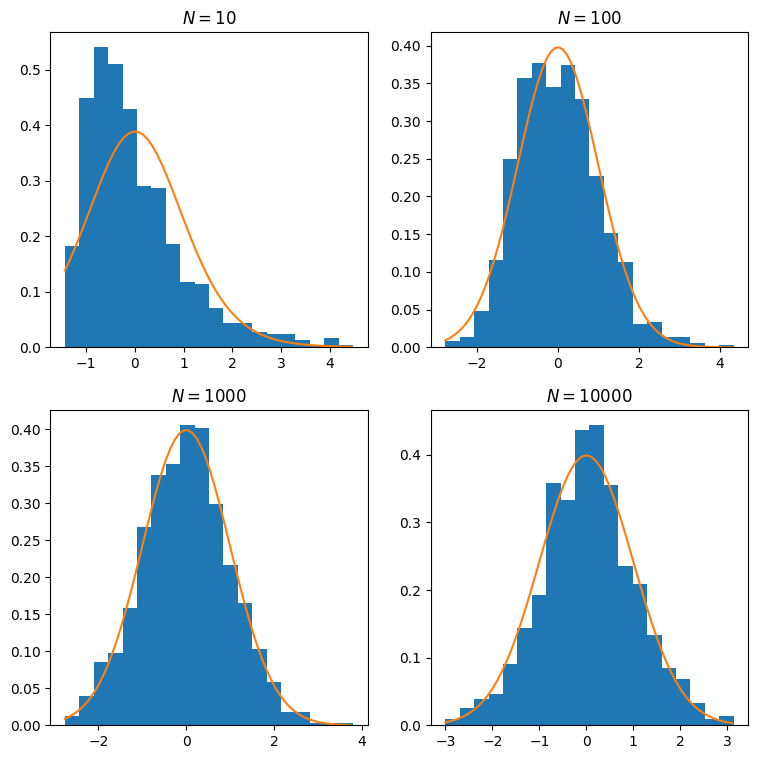

In [35]:
plt.figure(figsize=[9,9])
student_var = np.zeros(N_sample)

for i in range(0, 4):
    std_dev = np.std(integrals[i])
    student_var = (integrals[i] - 2 * sigma**4)/std_dev
    x = np.arange(np.min(student_var), np.max(student_var), 0.1)
    plt.subplot(2,2,i+1)
    plt.hist(student_var, bins=20, density=True, label = 'Estimates of $I$')
    plt.title(r'$N = {}$'.format(N[i]))
    distrT = sp.stats.t(N[i], 0)
    plt.plot(x, distrT.pdf(x), label = "Student's $t$ distr.")

We can see that for small $N$ the Student's $t$ distribution approximate badly the distribution of the Monte Carlo integral, whereas for $N$ large the approximation is good (actually, for $N$ large we could have used a normal distribution, since for $N$ large Student's $t$ distribution tends to the Gaussian one).